# Exploratory Data Analysis (EDA)

### Project Overview

This project aims to develop a machine learning application for a fashion e-commerce company to predict the success of potential products for the upcoming year. The company has compiled historical data on past products categorized as either "top" (successful) or "flop" (not successful). With this data, the goal is to build predictive models that can classify new product candidates as either "top" or "flop" based on their attributes.



### Dataset Description

#### Historic Data (historic.csv)
- Contains information on products from the past two years.
- Attributes include `item_no`, `category`, `main_promotion`, `color`, `stars`, and `success_indicator`.
- `item_no`: Internal identifier for a past product.
- `category`: Category of the product.
- `main_promotion`: Main promotion used to promote the product.
- `color`: The main color of the product.
- `stars`: Stars of reviews from a comparable product of a competitor (0= very negative reviews to 5= very positive reviews).
- `success_indicator`: Indicates whether a product was successful (top) or not (flop) in the past.

#### Prediction Data (prediction_input.csv)
- Contains information on potential products for the upcoming year.
- Similar attributes as the historic data, except for the absence of the `success_indicator`.

### Importing Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, ImageColorGenerator
%matplotlib inline

### Initial data exploration


In [2]:
df_hist = pd.read_csv("/content/historic.csv")

In [3]:
df_hist

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top
...,...,...,...,...,...,...
7995,280947,T-Shirt,Catalog,Blue,3.9,flop
7996,874952,Sweatshirt,Frontpage_Header,Green,3.5,top
7997,891640,T-Shirt,Category_Highlight,Yellow,4.0,flop
7998,786448,Blouse,Category_Highlight,Blue,2.6,flop


In [4]:
# Check for empty values
null_values = df_hist.isnull().sum()
print("Null Values:\n", null_values)

Null Values:
 item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64


In [5]:
# Check for duplicate rows
df_hist.duplicated().value_counts()

False    8000
dtype: int64

In [6]:
#Check information about columns, number of null entries and datatypes
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [7]:
#Check the shape of the DataFrame
shape = df_hist.shape
print("\nShape of Data:", shape)


Shape of Data: (8000, 6)


Check for unique values in every column

In [8]:
category_counts = df_hist["category"].value_counts()
category_counts

Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

In [9]:
# final_df_hist.to_csv('train_df_hist.csv',index=False)

In [10]:
success_indicator_counts = df_hist["success_indicator"].value_counts()
success_indicator_counts

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [11]:
main_promotion_counts = df_hist["main_promotion"].value_counts()
main_promotion_counts

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

## Data Analysis


Here we will do individual Analysis on each column of the dataset

### Analysis on "item_no"

In [12]:
df_hist['item_no'].describe()

count      8000.000000
mean     546474.338375
std      256513.463874
min      100171.000000
25%      325001.500000
50%      547081.000000
75%      764312.250000
max      989740.000000
Name: item_no, dtype: float64

In [13]:
df_hist['item_no'].duplicated().value_counts()

False    8000
Name: item_no, dtype: int64

In [14]:
#Check the distribution and unique values of "item_no"
print("Number of unique item numbers:", df_hist['item_no'].nunique())
print("Distribution of item numbers:")
print(df_hist['item_no'].value_counts())



Number of unique item numbers: 8000
Distribution of item numbers:
739157    1
802020    1
514320    1
543855    1
200451    1
         ..
225996    1
329814    1
129930    1
157681    1
847223    1
Name: item_no, Length: 8000, dtype: int64


Since "item_no" is a unique identifier, it's unlikely to have a direct correlation with the target variable "success_indicator"


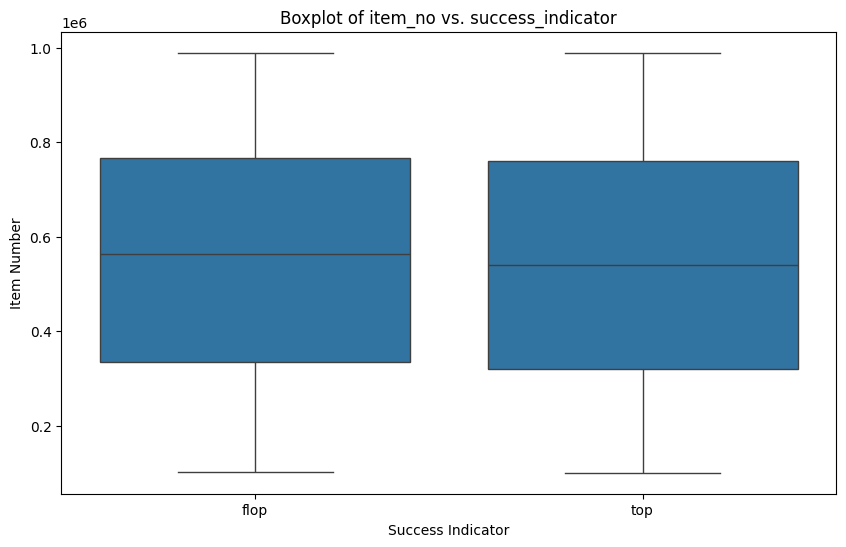

In [15]:
#Since "item_no" is a unique identifier, it's not suitable for visualization in its raw form
#However, we can visualize the distribution of the target variable based on certain groups or categories of "item_no"

plt.figure(figsize=(10, 6))
sns.boxplot(x='success_indicator', y='item_no', data=df_hist)
plt.title('Boxplot of item_no vs. success_indicator')
plt.xlabel('Success Indicator')
plt.ylabel('Item Number')
plt.show()


Since the "item_no" feature exhibits high variance with all values being unique, it does not contribute to predicting the output or target variable.

Therefore, it can be dropped from the dataset as it does not provide meaningful information for our analysis or modeling process.

In [16]:
df_hist.drop(columns=['item_no'], inplace=True)

In [17]:
df_hist

,category,main_promotion,color,stars,success_indicator
0,Tunic,Catalog,Green,3.1,flop
1,Hoodie,Category_Highlight,Red,1.5,flop
2,Sweatshirt,Catalog,Red,4.4,top
3,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,Hoodie,Category_Highlight,Green,4.1,top
...,...,...,...,...,...
7995,T-Shirt,Catalog,Blue,3.9,flop
7996,Sweatshirt,Frontpage_Header,Green,3.5,top
7997,T-Shirt,Category_Highlight,Yellow,4.0,flop
7998,Blouse,Category_Highlight,Blue,2.6,flop


### Analysis on "category"

In [18]:
#Check the distribution and unique values of "category"
print("Number of unique categories:", df_hist['category'].nunique())
print("Distribution of categories:")
print(df_hist['category'].value_counts())



Number of unique categories: 6
Distribution of categories:
Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64


In [19]:
#Analyze the distribution of "category" with respect to the target variable "success_indicator"
category_success_counts = df_hist.groupby(['category', 'success_indicator']).size().unstack(fill_value=0)
print("\nDistribution of success indicators across categories:")
print(category_success_counts)




Distribution of success indicators across categories:
success_indicator  flop   top
category                     
Blouse              363   883
Hoodie              258   481
Polo-Shirt          817   729
Sweatshirt          453   907
T-Shirt             271  1188
Tunic               653   997


<ipython-input-20-5c175f9125e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


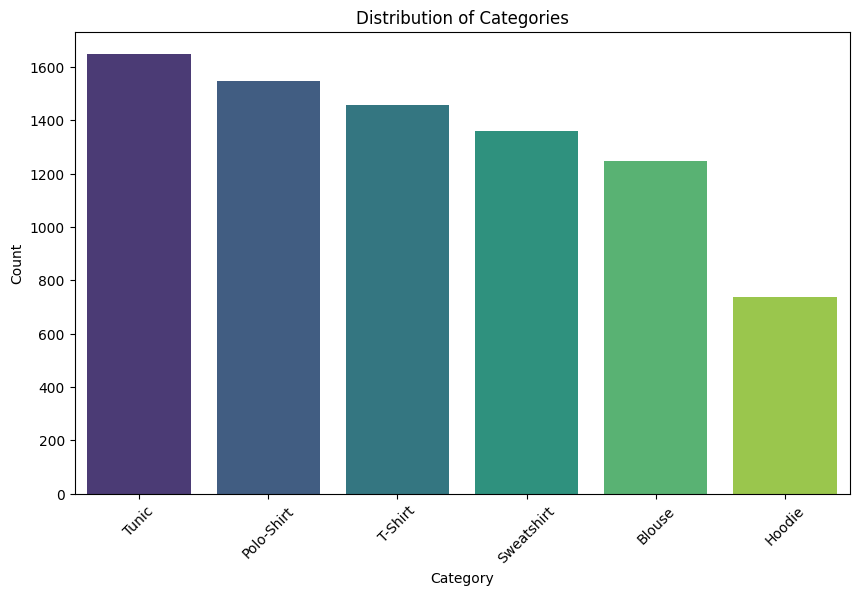

In [20]:
# Plotting the distribution of categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

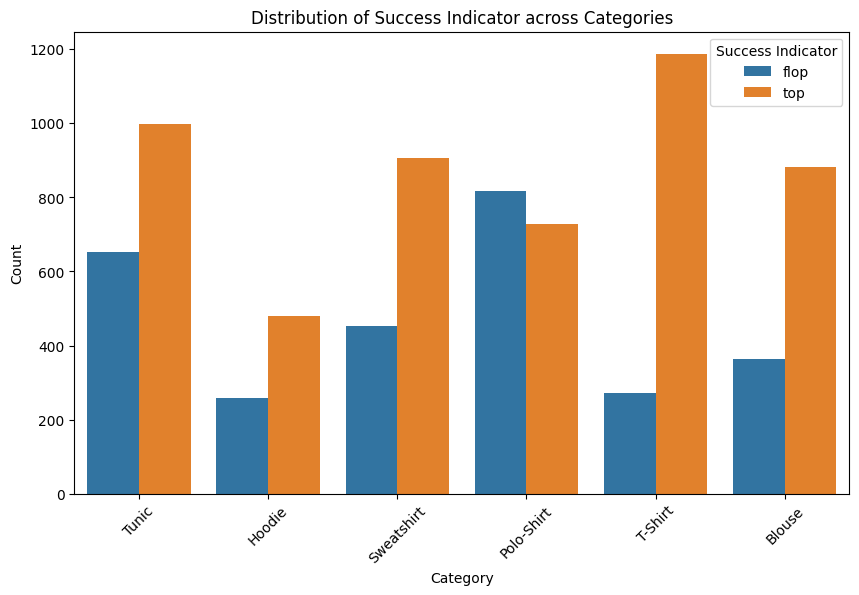

In [21]:
#Visualize the distribution of "category" and its relationship with the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='success_indicator', data=df_hist)
plt.title('Distribution of Success Indicator across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Success Indicator')
plt.show()


As evident from the analysis, there are 6 categories of the product:
- Tunic
- Polo-Shirt
- T-Shirt
- Sweatshirt
- Blouse
- Hoodie

These categories are "categorical" in nature, as such we need to convert them to numerical datatype for Feature Engineering

We will use label encoder method to convert the values and map them accordingly:

- Tunic --> 0
- Polo-Shirt --> 1
- T-Shirt --> 2
- Sweatshirt --> 3
- Blouse --> 4
- Hoodie --> 4

In [22]:
df_hist['category'].value_counts()


Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

In [23]:
# Apply LabelEncoder to the 'category' column
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()# final_df_hist.to_csv('train_df_hist.csv',index=False)
encoded_category1 = le1.fit_transform(df_hist['category'])
print(encoded_category1)



[5 1 3 ... 4 0 3]


In [24]:
df_hist['category'] = encoded_category1

encoded_categories1 = le1.classes_
encoded_categories1



array(['Blouse', 'Hoodie', 'Polo-Shirt', 'Sweatshirt', 'T-Shirt', 'Tunic'],
      dtype=object)

In [25]:
# Print the mapping of encoded values to original categories

encoded_values1 = le1.transform(encoded_categories1)
category_mapping1 = dict(zip(encoded_categories1, encoded_values1))
for category1, value1 in category_mapping1.items():
    print(f"Original Category: {category1}, Encoded Value: {value1}")

Original Category: Blouse, Encoded Value: 0
Original Category: Hoodie, Encoded Value: 1
Original Category: Polo-Shirt, Encoded Value: 2
Original Category: Sweatshirt, Encoded Value: 3
Original Category: T-Shirt, Encoded Value: 4
Original Category: Tunic, Encoded Value: 5


In [26]:
# Bivariate analysis between 'category' and 'success_indicator'
print("Bivariate analysis between 'category' and 'success_indicator':")
cross_tab = pd.crosstab(df_hist['category'], df_hist['success_indicator'])
print(cross_tab)
print()

Bivariate analysis between 'category' and 'success_indicator':
success_indicator  flop   top
category                     
0                   363   883
1                   258   481
2                   817   729
3                   453   907
4                   271  1188
5                   653   997



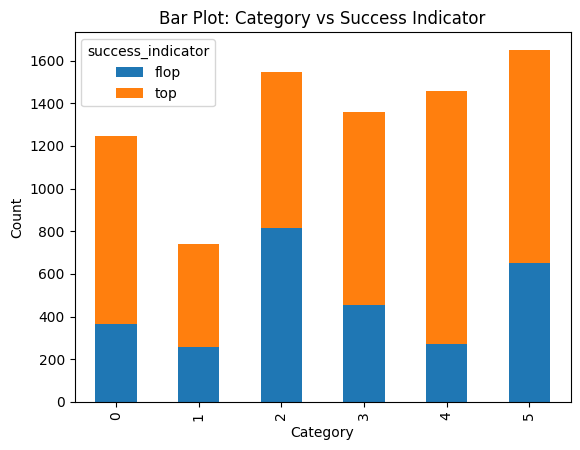

In [27]:
cross_tab = pd.crosstab(df_hist['category'], df_hist['success_indicator'])

cross_tab.plot.bar(stacked=True) # will plot the stacked bar plot

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot: Category vs Success Indicator')
plt.show()


### Analysis on "Main Promotion"

In [28]:
df_hist['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

In [29]:
# Apply LabelEncoder to the 'main_promotion' column

from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
encoded_main_promotion = le2.fit_transform(df_hist['main_promotion'])
print(encoded_main_promotion)



[0 1 0 ... 1 1 2]


In [30]:
df_hist['main_promotion'] = encoded_main_promotion

encoded_categories_mp = le2.classes_
encoded_categories_mp



array(['Catalog', 'Category_Highlight', 'Display_Ad_Campaign',
       'Frontpage_Header'], dtype=object)

In [31]:
encoded_values2 = le2.transform(encoded_categories_mp)
category_mapping2 = dict(zip(encoded_categories_mp, encoded_values2)) # dictionary mapping the names to the numerical values
for mp, value2 in category_mapping2.items():
    print(f"Encoded Category: {mp}, Encoded Value: {value2}")  # encoded value with its original name



Encoded Category: Catalog, Encoded Value: 0
Encoded Category: Category_Highlight, Encoded Value: 1
Encoded Category: Display_Ad_Campaign, Encoded Value: 2
Encoded Category: Frontpage_Header, Encoded Value: 3


In [32]:
# Bivarite of main_promotion and success_indicator feature

cross_tab2 = pd.crosstab(df_hist['main_promotion'], df_hist['success_indicator'])
cross_tab2


success_indicator,flop,top
main_promotion,,
0,953,1293
1,930,1502
2,335,974
3,597,1416


In [33]:
print(df_hist[(df_hist['main_promotion'] == 0  ) & (df_hist['success_indicator'] == 1)].shape)
print(df_hist[df_hist['main_promotion'] == 0].shape)


(0, 5)
(2246, 5)


In [34]:
df_hist[df_hist['main_promotion'] == 1].shape
df_hist[(df_hist['main_promotion'] ==  1 ) & (df_hist['success_indicator'] == 1)].shape

(0, 5)

In [35]:
df_hist[df_hist['main_promotion'] == 2].shape
df_hist[(df_hist['main_promotion'] == 2  ) & (df_hist['success_indicator'] == 1)].shape

(0, 5)

In [36]:
df_hist[df_hist['main_promotion'] == 3].shape
df_hist[(df_hist['main_promotion'] == 3  ) & (df_hist['success_indicator'] == 1)].shape

(0, 5)

Based on the bivariate analysis between the main promotion methods and success rates, the following observations can be made:

- Catalog: Success rate is 57%.
- Category_Highlight: Success rate is 61%.
- Display_Ad_Campaign: Success rate is 74%.
- Frontpage_Header: Success rate is 70%.

From these findings, it can be inferred that the Display_Ad_Campaign and Frontpage_Header promotions have higher success rates compared to Catalog and Category_Highlight. Therefore, the company should focus more on Display_Ad_Campaign and Frontpage_Header promotions while allocating resources and designing marketing strategies. Conversely, less emphasis may be placed on Catalog and Category_Highlight promotions, considering their lower success rates.

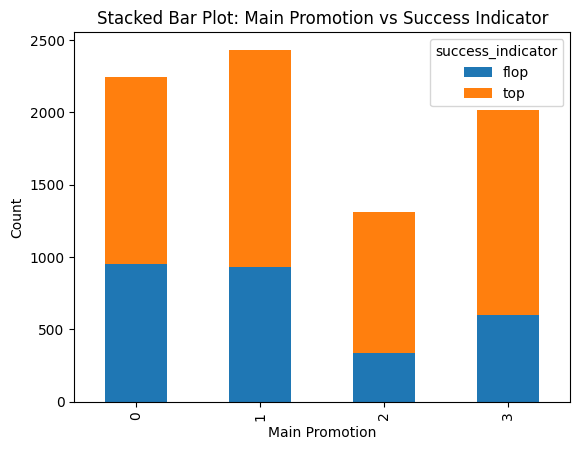

In [37]:

cross_tab2 = pd.crosstab(df_hist['main_promotion'], df_hist['success_indicator'])
cross_tab2.plot.bar(stacked=True)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator')
plt.show()



### Analysis on "Color"

In [38]:
df_hist['color'].value_counts()


Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

In [39]:

from sklearn.preprocessing import LabelEncoder
le3 = LabelEncoder()
encoded_color = le3.fit_transform(df_hist['color'])
print(encoded_color)


[3 7 7 ... 9 1 1]


In [40]:

df_hist['color'] = encoded_color




In [41]:
encoded_color_class = le3.classes_
encoded_color_class


array(['Black', 'Blue', 'Brown', 'Green', 'Multi-Color', 'Orange', 'Pink',
       'Red', 'White', 'Yellow'], dtype=object)

In [42]:
encoded_values3 = le3.transform(encoded_color_class)
category_mapping3 = dict(zip(encoded_color_class, encoded_values3))
for color, value3 in category_mapping3.items():
    print(f"Encoded Category: {color}, Encoded Value: {value3}")



Encoded Category: Black, Encoded Value: 0
Encoded Category: Blue, Encoded Value: 1
Encoded Category: Brown, Encoded Value: 2
Encoded Category: Green, Encoded Value: 3
Encoded Category: Multi-Color, Encoded Value: 4
Encoded Category: Orange, Encoded Value: 5
Encoded Category: Pink, Encoded Value: 6
Encoded Category: Red, Encoded Value: 7
Encoded Category: White, Encoded Value: 8
Encoded Category: Yellow, Encoded Value: 9


In [43]:
df_hist.head()



,category,main_promotion,color,stars,success_indicator
0,5,0,3,3.1,flop
1,1,1,7,1.5,flop
2,3,0,7,4.4,top
3,2,1,1,3.1,flop
4,1,1,3,4.1,top


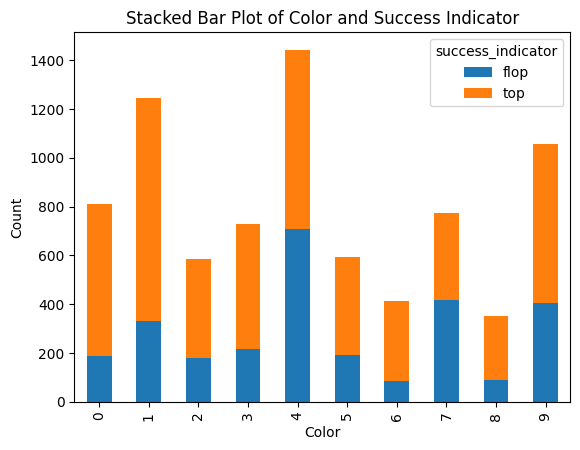

In [44]:
ct = pd.crosstab(df_hist['color'], df_hist['success_indicator'])
ct.plot(kind='bar', stacked=True)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()


### Analysis on "Star"

 The "stars" feature represents the Stars of reviews from a comparable product of a competitor (from 0 = very negative reviews to 5 = very positive reviews).

 Based on this, we can convert the "stars" feature into two bins:
    
  - **1st Bin (Class 'FLOP'):** This bin will contain all stars with a value less than or equal to 3. We'll assign it the digit 0 to represent products that received lower ratings, indicating potential failure.
    
  - **2nd Bin (Class 'TOP'):** This bin will contain all stars with a value greater than 3. We'll assign it the digit 1 to represent products that received higher ratings, indicating potential success.

This approach allows us to categorize the "stars" feature into two classes, making it suitable for binary classification tasks, such as predicting the success or failure of products based on their ratings.

In [45]:
df_hist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 312.6+ KB


In [46]:
df_hist['stars'] = df_hist['stars'].astype(float)


In [47]:
df_hist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 312.6+ KB


In [48]:

# Binning stars into two categories
df_hist['stars'] = np.where(df_hist['stars'] <= 3, 0, df_hist['stars'])

df_hist['stars'] = np.where(df_hist['stars'] > 3, 1, df_hist['stars'])

df_hist['stars'].value_counts()

1.0    5278
0.0    2722
Name: stars, dtype: int64

In [49]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 312.6+ KB


In [50]:
df_hist.head()

,category,main_promotion,color,stars,success_indicator
0,5,0,3,1.0,flop
1,1,1,7,0.0,flop
2,3,0,7,1.0,top
3,2,1,1,1.0,flop
4,1,1,3,1.0,top


### Analysis on "success_indicator"

In [51]:
df_hist['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [52]:
# Apply LabelEncoder to the 'success_indicator' column, where TOP = 0 and FLOP = 1

encoder = LabelEncoder()
df_hist['success_indicator'] = encoder.fit_transform(df_hist['success_indicator'])

In [53]:


df_hist['success_indicator'].value_counts() # will encoded new target column WHERE TOP = 1 and FLOP =0



1    5185
0    2815
Name: success_indicator, dtype: int64

In [54]:
df_hist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 312.6 KB


In [55]:
df_hist

,category,main_promotion,color,stars,success_indicator
0,5,0,3,1.0,0
1,1,1,7,0.0,0
2,3,0,7,1.0,1
3,2,1,1,1.0,0
4,1,1,3,1.0,1
...,...,...,...,...,...
7995,4,0,1,1.0,0
7996,3,3,3,1.0,1
7997,4,1,9,1.0,0
7998,0,1,1,0.0,0


In [56]:
df_hist['success_indicator'].value_counts()


1    5185
0    2815
Name: success_indicator, dtype: int64

In [57]:
# Checking for data balancing and imbalancing

(2815/8000)*100


35.1875

In [58]:
(5185/8000)*100



64.8125

The dataset exhibits class imbalance, where approximately 65% of the data belongs to the 'TOP' class, and approximately 35% of the data belongs to the 'FLOP' class. This imbalance can lead to biased predictions, where the model may favor the majority class ('TOP') and perform poorly on the minority class ('FLOP').
   


Due to this, predictive models trained on such datasets tend to be biased towards the majority class. In this case, the model may become proficient at predicting instances from the 'TOP' class but may struggle to accurately predict instances from the 'FLOP' class.
   

   
   
Therefore, to mitigate the imbalance, the Synthetic Minority Over-sampling Technique (SMOTE) is employed. SMOTE works by generating synthetic samples from the minority class ('FLOP') to balance the class distribution. This technique helps to overcome the bias towards the majority class by augmenting the dataset with synthetic instances, thereby improving the model's ability to learn from the minority class.

In [59]:
from imblearn.over_sampling import SMOTE
x = df_hist.drop('success_indicator', axis=1)
y = df_hist['success_indicator']

smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(x, y)
df_hist_balanced = pd.concat([x_balanced, y_balanced], axis=1)
print(df_hist_balanced)

       category  main_promotion  color  stars  success_indicator
0             5               0      3    1.0                  0
1             1               1      7    0.0                  0
2             3               0      7    1.0                  1
3             2               1      1    1.0                  0
4             1               1      3    1.0                  1
...         ...             ...    ...    ...                ...
10365         3               0      4    0.0                  0
10366         5               0      3    0.0                  0
10367         0               3      4    0.0                  0
10368         4               0      0    1.0                  0
10369         2               0      4    1.0                  0

[10370 rows x 5 columns]


In [60]:
df_hist_balanced.head()

,category,main_promotion,color,stars,success_indicator
0,5,0,3,1.0,0
1,1,1,7,0.0,0
2,3,0,7,1.0,1
3,2,1,1,1.0,0
4,1,1,3,1.0,1


In [61]:
df_hist_balanced.shape

(10370, 5)

In [62]:
df_hist_balanced['success_indicator'].value_counts()

0    5185
1    5185
Name: success_indicator, dtype: int64

In [63]:
df_hist

,category,main_promotion,color,stars,success_indicator
0,5,0,3,1.0,0
1,1,1,7,0.0,0
2,3,0,7,1.0,1
3,2,1,1,1.0,0
4,1,1,3,1.0,1
...,...,...,...,...,...
7995,4,0,1,1.0,0
7996,3,3,3,1.0,1
7997,4,1,9,1.0,0
7998,0,1,1,0.0,0


In [64]:
df_hist.to_csv('train_df.csv',index=False)